## Plotting the figures from the article

### Imports 

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

### Helper functions

In [7]:
def calcPowerSpectrum(meg,dt,sim_time):
    ''' Function that calculates a power spectrum from a time series
        
        Parameters:
            meg      : the simulated time series
            dt       : the time step
            sim_time : the simulation duration (in ms)
        Return:
            pxx      : the power spectrum
            freqs    : the frequency vector
    '''
    # fourier sample rate
    fs = 1. / dt

    tn = np.linspace(0,sim_time,int(sim_time/dt)+1)

    npts = len(meg)


    pxx,freqs=mlab.psd(meg,NFFT=npts,Fs=fs,noverlap=0,window=mlab.window_none)
    pxx[0] = 0.0

    return pxx,freqs


In [8]:
def getSingleSpikeTimes(neuron,dt):
    '''Function that calculates spike times from the trace of a single neuron
    
        Parameters:
            neuron      : the trace of a single neuron
            dt          : the time step
        Return:
            spike_times : a list of spike times
    '''
    spike_times = []
    old = 0.0
    for i,n in enumerate(neuron):
        # if theta passes (2l-1)*pi, l integer, with dtheta/dt>0 then the neuron spikes (see Boergers and Kopell, 2003)
        if (n%(2*np.pi))>np.pi and (old%(2*np.pi))<np.pi:
            spike_time = i*dt # calculate spike time in ms
            spike_times.append(spike_time) # add spike time to list
        old = n

    return spike_times

In [9]:
def getSpikeTimes(data,dt):
    '''Function that calculates spike times from the traces of a population of neurons
    
        Parameters:
            data      : the array of traces of the population
            dt          : the time step
        Return:
            spike_times : a list of lists of spike times
    '''
    nx,ny = data.shape
    spike_times = [None]*nx
    for i in range(nx):
        spike_times[i] = getSingleSpikeTimes(data[i,:],dt)
    return spike_times

### Load data (averaged over all trials)

In [10]:
ctrl_avg_meg_20 = np.load('../data/sims_ctrl_avg_20Hz.npy')
ctrl_avg_meg_30 = np.load('../data/sims_ctrl_avg_30Hz.npy')
ctrl_avg_meg_40 = np.load('../data/sims_ctrl_avg_40Hz.npy')

schiz_avg_meg_20 = np.load('../data/sims_schiz_avg_20Hz.npy')
schiz_avg_meg_30 = np.load('../data/sims_schiz_avg_30Hz.npy')
schiz_avg_meg_40 = np.load('../data/sims_schiz_avg_40Hz.npy')

### Additional parameters

In [11]:
sim_time = 500
s = 2**13
dt = float(sim_time)/float(s)
time = np.linspace(0,sim_time,int(sim_time/dt))

### Produce Figure 1 (replicates Figure 4 from Vierling-Claassen et al.)

[None, None, None, None, None, None, None, None, None, None, None, None]

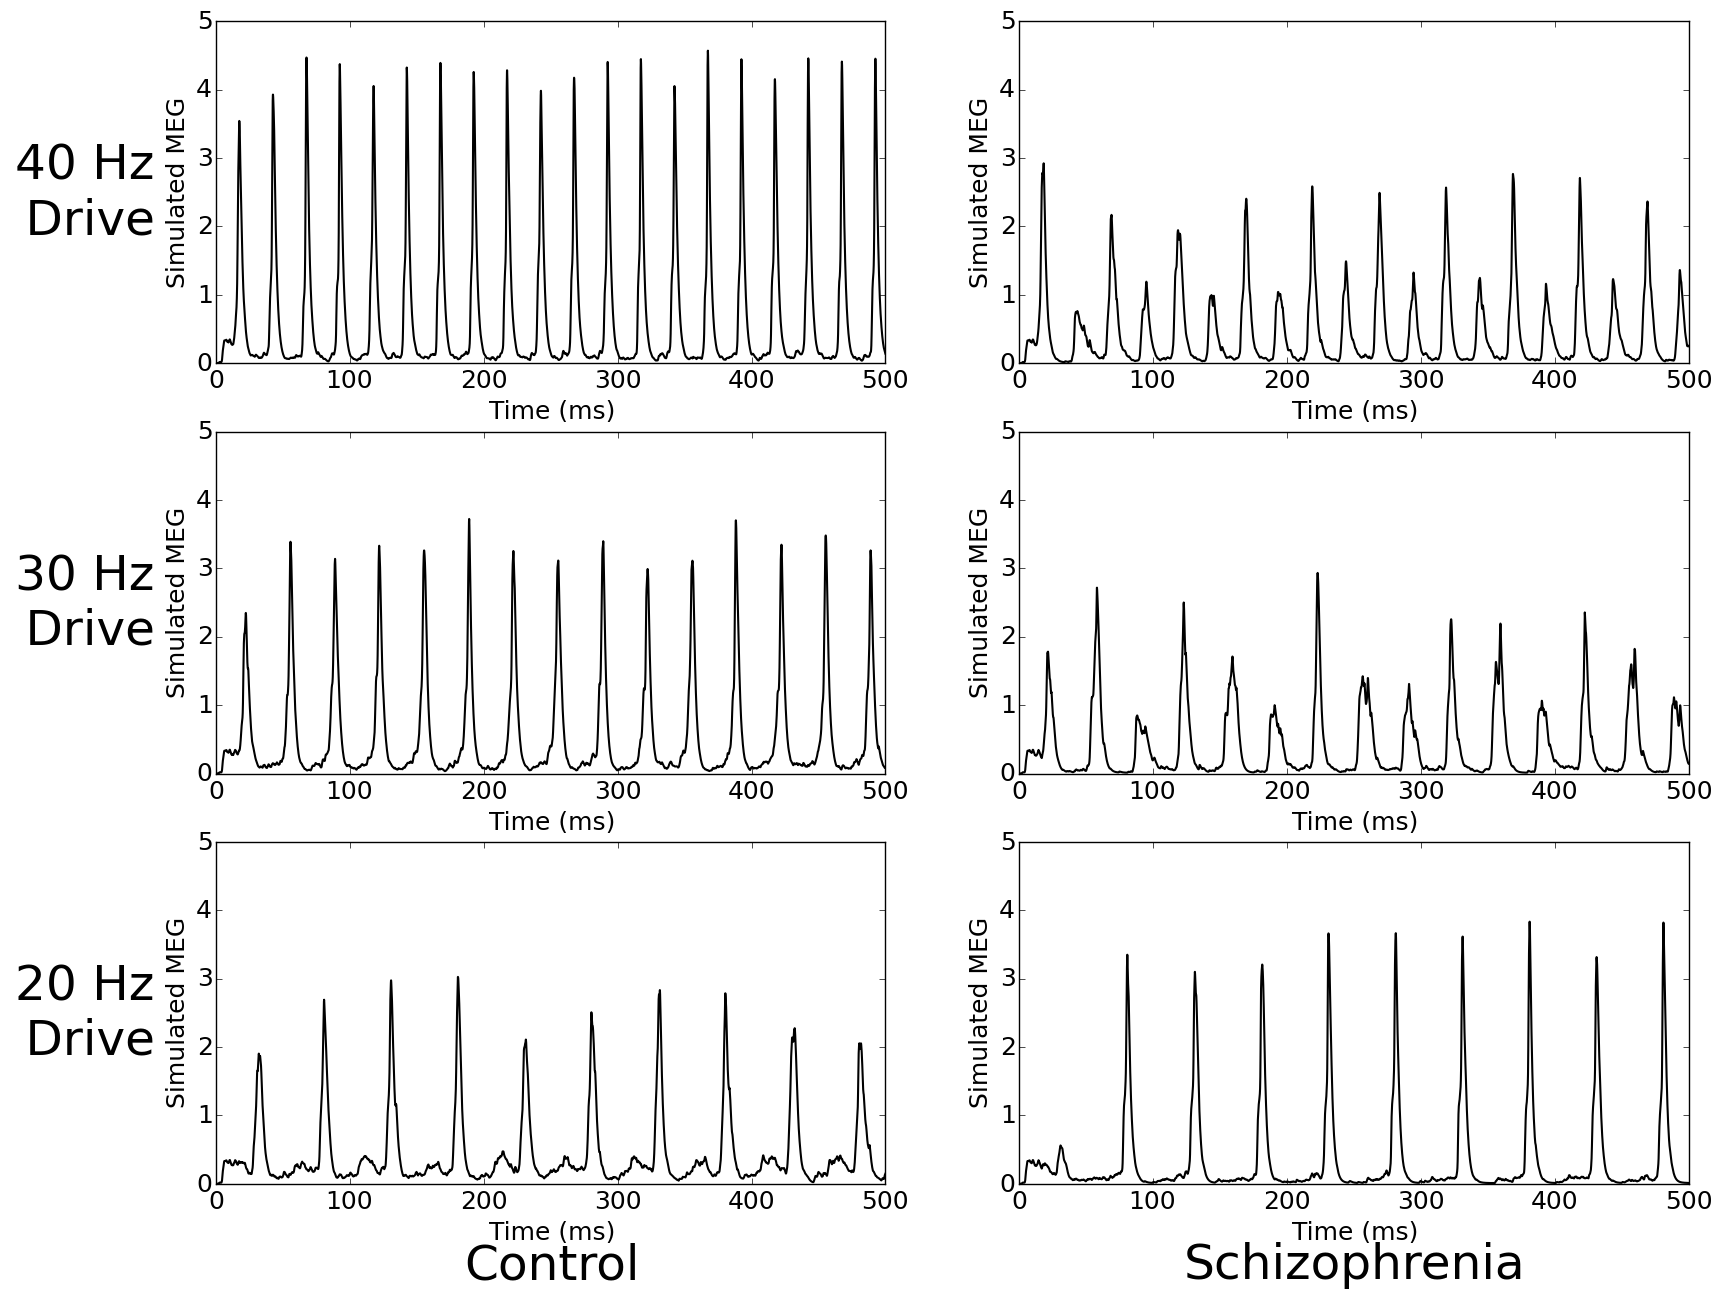

In [12]:
f,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,sharex=True,sharey=True,figsize=[19.0,15.0])

ax1.plot(time,ctrl_avg_meg_40,'k',linewidth=1.5)
ax1.set_xlabel('Time (ms)',fontsize=18)
ax1.set_ylabel('Simulated MEG',fontsize=18)
ax1.annotate('40 Hz \n Drive',xy=(0,0.5),xytext=(-ax1.yaxis.labelpad-5,0),xycoords=ax1.yaxis.label,textcoords='offset points',size=35,ha='right',va='center')
ax2.plot(time,schiz_avg_meg_40,'k',linewidth=1.5)
ax2.set_xlabel('Time (ms)',fontsize=18)
ax2.set_ylabel('Simulated MEG',fontsize=18)
ax3.plot(time,ctrl_avg_meg_30,'k',linewidth=1.5)
ax3.set_xlabel('Time (ms)',fontsize=18)
ax3.set_ylabel('Simulated MEG',fontsize=18)
ax3.annotate('30 Hz \n Drive',xy=(0,0.5),xytext=(-ax3.yaxis.labelpad-5,0),xycoords=ax3.yaxis.label,textcoords='offset points',size=35,ha='right',va='center')
ax4.plot(time,schiz_avg_meg_30,'k',linewidth=1.5)
ax4.set_xlabel('Time (ms)',fontsize=18)
ax4.set_ylabel('Simulated MEG',fontsize=18)
ax5.plot(time,ctrl_avg_meg_20,'k',linewidth=1.5)
ax5.set_xlabel('Time (ms)',fontsize=18)
ax5.set_ylabel('Simulated MEG',fontsize=18)
ax5.annotate('20 Hz \n Drive',xy=(0,0.5),xytext=(-ax5.yaxis.labelpad-5,0),xycoords=ax5.yaxis.label,textcoords='offset points',size=35,ha='right',va='center')
ax5.annotate('Control',xy=(0.5,0),xytext=(0,-75),xycoords='axes fraction',textcoords='offset points',size=35,ha='center',va='bottom')
ax6.plot(time,schiz_avg_meg_20,'k',linewidth=1.5)
ax6.set_xlabel('Time (ms)',fontsize=18)
ax6.set_ylabel('Simulated MEG',fontsize=18)
ax6.annotate('Schizophrenia',xy=(0.5,0),xytext=(0,-75),xycoords='axes fraction',textcoords='offset points',size=35,ha='center',va='bottom')

plt.setp(ax1.get_xticklabels(),visible=True,fontsize=18)
plt.setp(ax2.get_xticklabels(),visible=True,fontsize=18)
plt.setp(ax3.get_xticklabels(),visible=True,fontsize=18)
plt.setp(ax4.get_xticklabels(),visible=True,fontsize=18)
plt.setp(ax5.get_xticklabels(),visible=True,fontsize=18)
plt.setp(ax6.get_xticklabels(),visible=True,fontsize=18)

plt.setp(ax2.get_yticklabels(),visible=True,fontsize=18)
plt.setp(ax4.get_yticklabels(),visible=True,fontsize=18)
plt.setp(ax6.get_yticklabels(),visible=True,fontsize=18)
plt.setp(ax1.get_yticklabels(),visible=True,fontsize=18)
plt.setp(ax3.get_yticklabels(),visible=True,fontsize=18)
plt.setp(ax5.get_yticklabels(),visible=True,fontsize=18)


### Produce Figure 2 (replicates Figure 5 from Vierling-Claassen et al.)

#### Calculate power spectra

In [13]:
pxx_ctrl_20,freqs = calcPowerSpectrum(ctrl_avg_meg_20,dt,sim_time)
pxx_schiz_20,_ = calcPowerSpectrum(schiz_avg_meg_20,dt,sim_time)
pxx_ctrl_30,_ = calcPowerSpectrum(ctrl_avg_meg_30,dt,sim_time)
pxx_schiz_30,_ = calcPowerSpectrum(schiz_avg_meg_30,dt,sim_time)
pxx_ctrl_40,_ = calcPowerSpectrum(ctrl_avg_meg_40,dt,sim_time)
pxx_schiz_40,_ = calcPowerSpectrum(schiz_avg_meg_40,dt,sim_time)

#### Plot figure

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

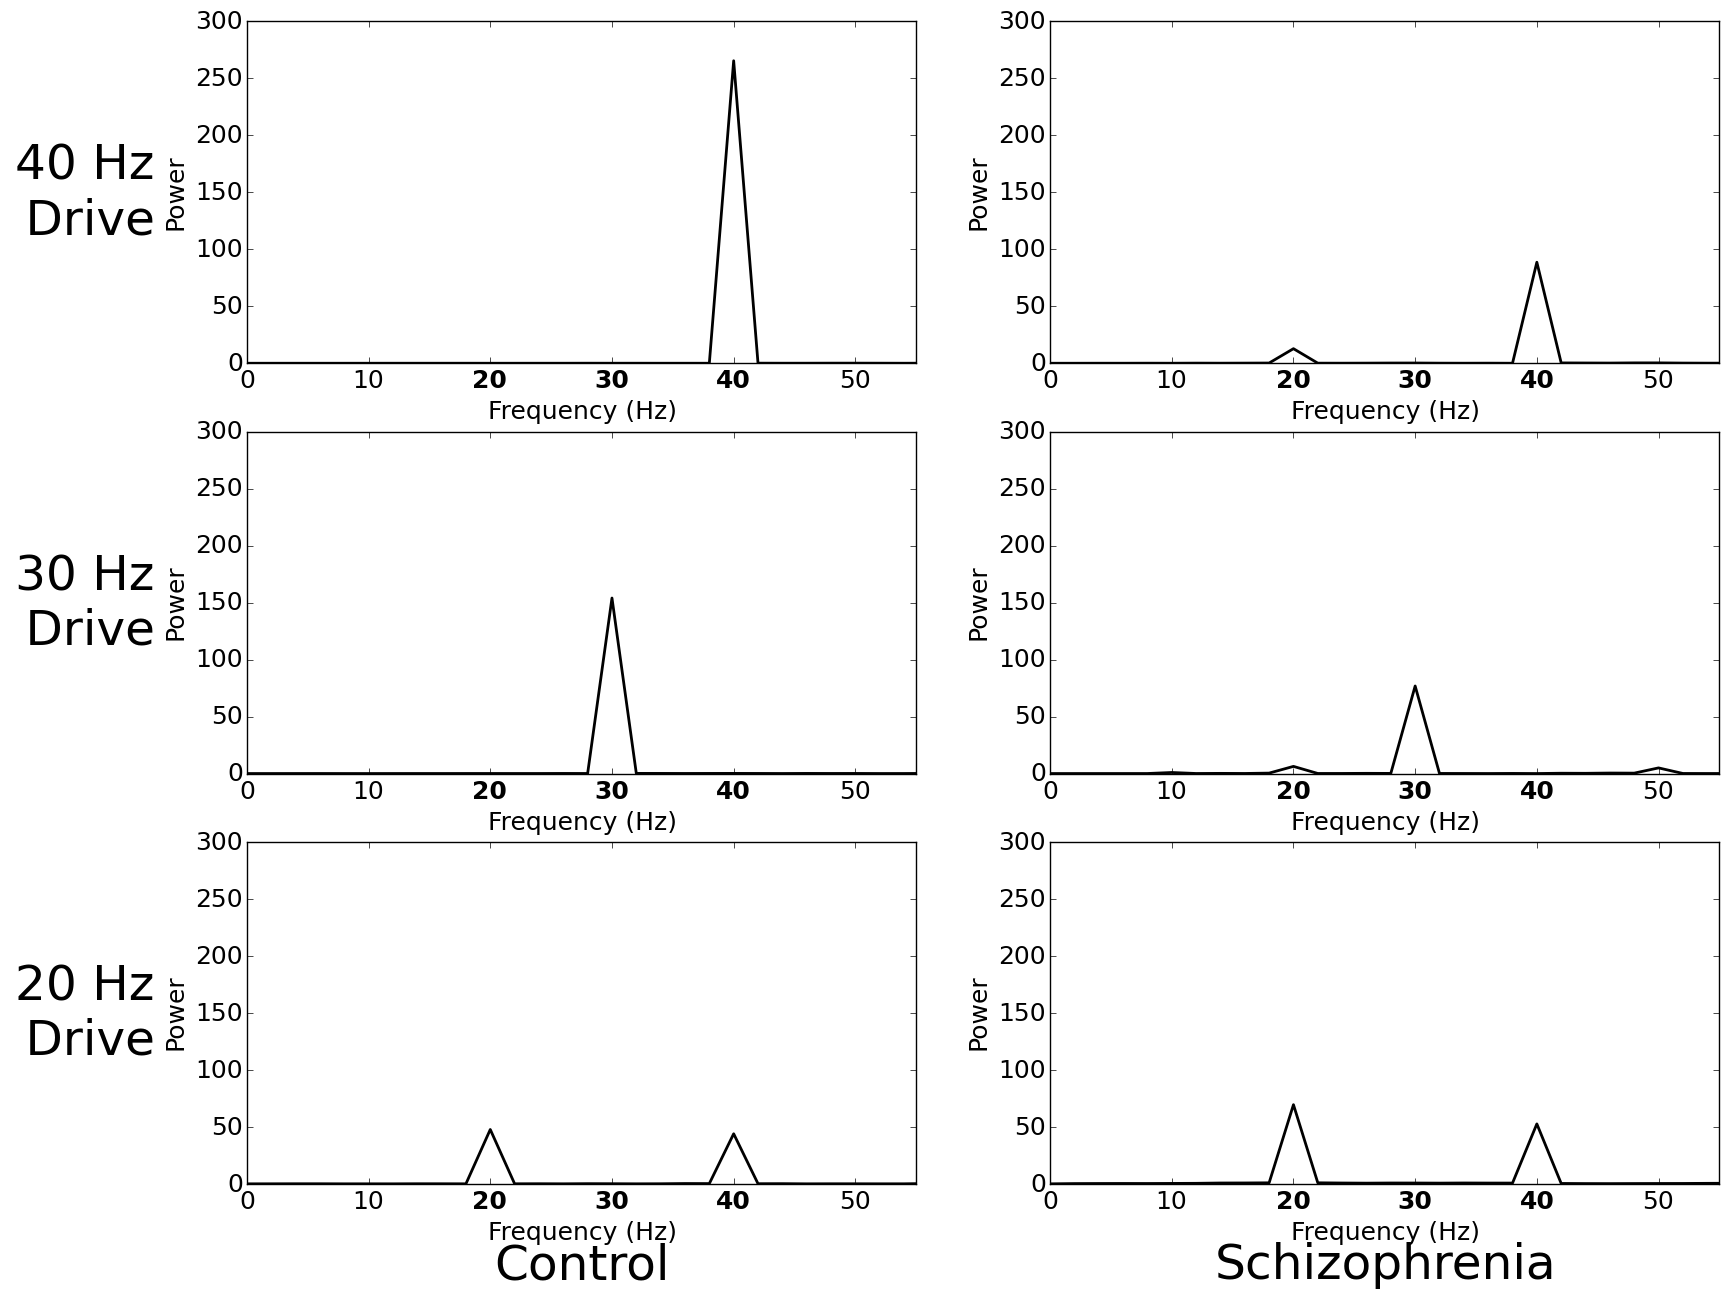

In [14]:
f2,((ax11,ax22),(ax33,ax44),(ax55,ax66)) = plt.subplots(3,2,sharex=True,sharey=True,figsize=[19.0,15.0])

ax11.plot(freqs*1000,pxx_ctrl_40,'k',linewidth=2)
ax11.axis(xmin=0, xmax=55)
ax11.set_xlabel('Frequency (Hz)',fontsize=18)
ax11.set_ylabel('Power',fontsize=18)
ax11.annotate('40 Hz \n Drive',xy=(0,0.5),xytext=(-ax11.yaxis.labelpad-5,0),xycoords=ax11.yaxis.label,textcoords='offset points',size=35,ha='right',va='center')
xticks=ax11.xaxis.get_ticklabels()
xticks[2].set_weight('bold')
xticks[3].set_weight('bold')
xticks[4].set_weight('bold')

ax22.plot(freqs*1000,pxx_schiz_40,'k',linewidth=2)
ax22.set_xlabel('Frequency (Hz)',fontsize=18)
ax22.set_ylabel('Power',fontsize=18)
xticks=ax22.xaxis.get_ticklabels()
xticks[2].set_weight('bold')
xticks[3].set_weight('bold')
xticks[4].set_weight('bold')

ax33.plot(freqs*1000,pxx_ctrl_30,'k',linewidth=2)
ax33.set_xlabel('Frequency (Hz)',fontsize=18)
ax33.set_ylabel('Power',fontsize=18)
ax33.annotate('30 Hz \n Drive',xy=(0,0.5),xytext=(-ax33.yaxis.labelpad-5,0),xycoords=ax33.yaxis.label,textcoords='offset points',size=35,ha='right',va='center')
xticks=ax33.xaxis.get_ticklabels()
xticks[2].set_weight('bold')
xticks[3].set_weight('bold')
xticks[4].set_weight('bold')

ax44.plot(freqs*1000,pxx_schiz_30,'k',linewidth=2)
ax44.set_xlabel('Frequency (Hz)',fontsize=18)
ax44.set_ylabel('Power',fontsize=18)
xticks=ax44.xaxis.get_ticklabels()
xticks[2].set_weight('bold')
xticks[3].set_weight('bold')
xticks[4].set_weight('bold')

ax55.plot(freqs*1000,pxx_ctrl_20,'k',linewidth=2)
ax55.set_xlabel('Frequency (Hz)',fontsize=18)
ax55.set_ylabel('Power',fontsize=18)
ax55.annotate('20 Hz \n Drive',xy=(0,0.5),xytext=(-ax55.yaxis.labelpad-5,0),xycoords=ax55.yaxis.label,textcoords='offset points',size=35,ha='right',va='center')
ax55.annotate('Control',xy=(0.5,0),xytext=(0,-75),xycoords='axes fraction',textcoords='offset points',size=35,ha='center',va='bottom')
xticks=ax55.xaxis.get_ticklabels()
xticks[2].set_weight('bold')
xticks[3].set_weight('bold')
xticks[4].set_weight('bold')

ax66.plot(freqs*1000,pxx_schiz_20,'k',linewidth=2)
ax66.set_xlabel('Frequency (Hz)',fontsize=18)
ax66.set_ylabel('Power',fontsize=18)
ax66.annotate('Schizophrenia',xy=(0.5,0),xytext=(0,-75),xycoords='axes fraction',textcoords='offset points',size=35,ha='center',va='bottom')
xticks=ax66.xaxis.get_ticklabels()
xticks[2].set_weight('bold')
xticks[3].set_weight('bold')
xticks[4].set_weight('bold')


plt.setp(ax11.get_xticklabels(),visible=True,fontsize=18)
plt.setp(ax22.get_xticklabels(),visible=True,fontsize=18)
plt.setp(ax33.get_xticklabels(),visible=True,fontsize=18)
plt.setp(ax44.get_xticklabels(),visible=True,fontsize=18)
plt.setp(ax55.get_xticklabels(),visible=True,fontsize=18)
plt.setp(ax66.get_xticklabels(),visible=True,fontsize=18)

plt.setp(ax22.get_yticklabels(),visible=True,fontsize=18)
plt.setp(ax44.get_yticklabels(),visible=True,fontsize=18)
plt.setp(ax66.get_yticklabels(),visible=True,fontsize=18)
plt.setp(ax11.get_yticklabels(),visible=True,fontsize=18)
plt.setp(ax33.get_yticklabels(),visible=True,fontsize=18)
plt.setp(ax55.get_yticklabels(),visible=True,fontsize=18)

### Produce Figure 3 (Replicates Figure 6 from Vierling-Claassen et al.)

#### Load data

In [15]:
data_ex  = np.load('../data/Single-Trial-Data-40Hz/sims_ctrl_40Hz0-Ex.npy')
data_inh = np.load('../data/Single-Trial-Data-40Hz/sims_ctrl_40Hz0-Inh.npy')
data_meg = np.load('../data/Single-Trial-Data-40Hz/sims_ctrl_40Hz0-MEG.npy')

#### Plot figure

[None, None, None, None, None, None]

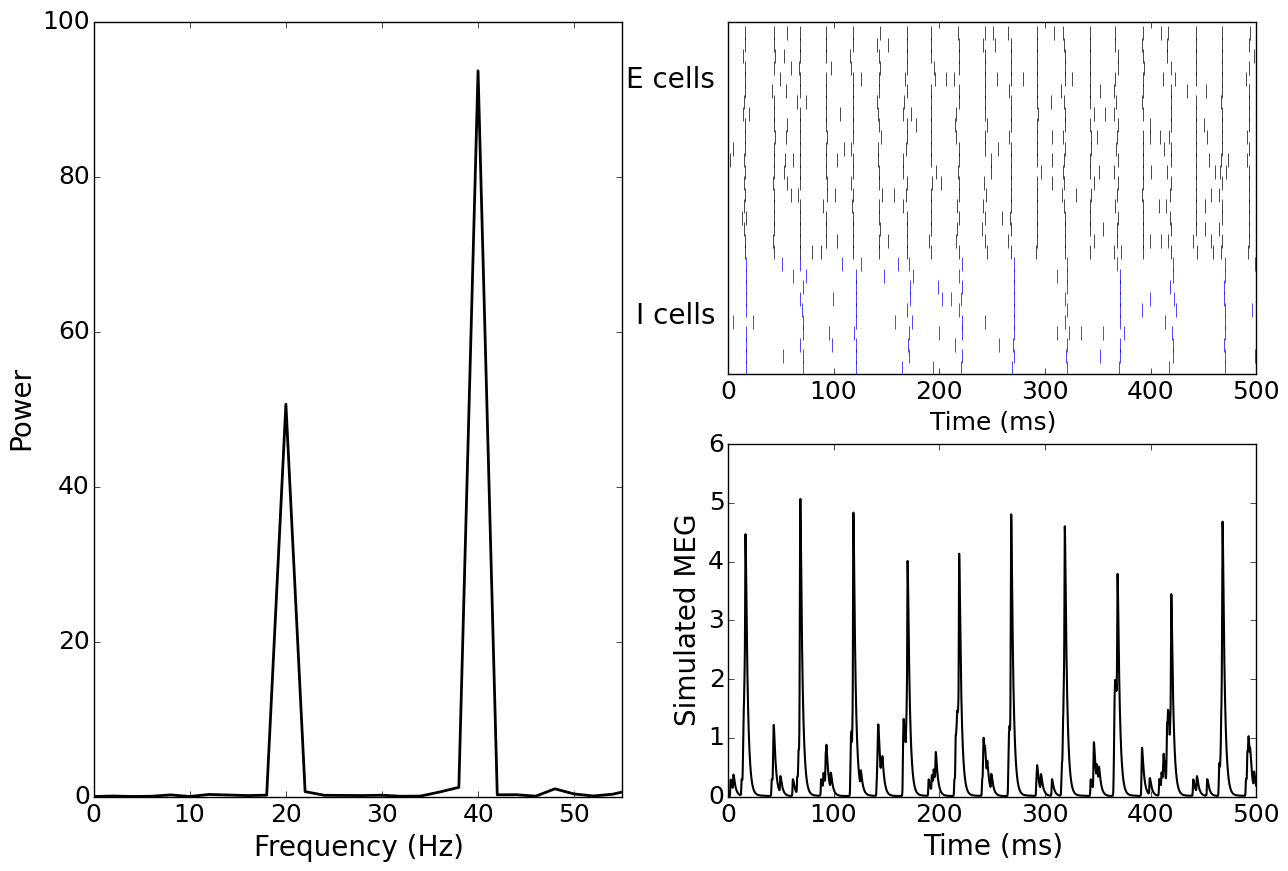

In [22]:
plt.figure(3,figsize=[15.0,10.0])
ax1 = plt.subplot2grid((2,2),(0,0), rowspan=2)
ax2 = plt.subplot2grid((2,2),(0,1))
ax3 = plt.subplot2grid((2,2),(1,1))


# Raster plot
spike_times = getSpikeTimes(data_ex,dt)
for i,times in enumerate(spike_times):
    y = [i+10]*len(times)
    ax2.plot(times,y,linestyle='None',color='k',marker='|',markersize=10)

spike_times = getSpikeTimes(data_inh,dt)
for i,times in enumerate(spike_times):
    y = [i]*len(times)
    ax2.plot(times,y,linestyle='None',color='b',marker='|',markersize=10)
    ax2.axis([0,sim_time,-0.5,30])
ax2.set_xlabel('Time (ms)',fontsize=18)
ax2.set_yticks([])
ax2.annotate('I cells',xy=(0,0.5),xytext=(-ax2.yaxis.labelpad,-75),xycoords=ax2.yaxis.label,textcoords='offset points',size=20,ha='right',va='top')
ax2.annotate('E cells',xy=(0,0.5),xytext=(-ax2.yaxis.labelpad,75),xycoords=ax2.yaxis.label,textcoords='offset points',size=20,ha='right',va='bottom')
plt.setp(ax2.get_xticklabels(),fontsize=18)

# MEG plot
ax3.plot(time,data_meg,'k',linewidth=1.5)
ax3.set_xlabel('Time (ms)',fontsize=20)
ax3.set_ylabel('Simulated MEG',fontsize=20)
plt.setp(ax3.get_xticklabels(),fontsize=18)
plt.setp(ax3.get_yticklabels(),fontsize=18)

# Power spectrum plot
pxx,freqs = calcPowerSpectrum(data_meg,dt,sim_time)

ax1.plot(freqs*1000,pxx,'k',linewidth=2)
ax1.axis(xmin=0, xmax=55)
ax1.set_xlabel('Frequency (Hz)',fontsize=20)
ax1.set_ylabel('Power',fontsize=20)
plt.setp(ax1.get_xticklabels(),fontsize=18)
plt.setp(ax1.get_yticklabels(),fontsize=18)


### Produce Figure 4 (Replicates Figure 7 from Vierling-Claassen et al.)

#### Load data

In [23]:
data_ex  = np.load('../data/Single-Trial-Data-40Hz/sims_schiz_40Hz0-Ex.npy')
data_inh = np.load('../data/Single-Trial-Data-40Hz/sims_schiz_40Hz0-Inh.npy')
data_meg = np.load('../data/Single-Trial-Data-40Hz/sims_schiz_40Hz0-MEG.npy')

#### Plot figure

[None, None, None, None, None, None]

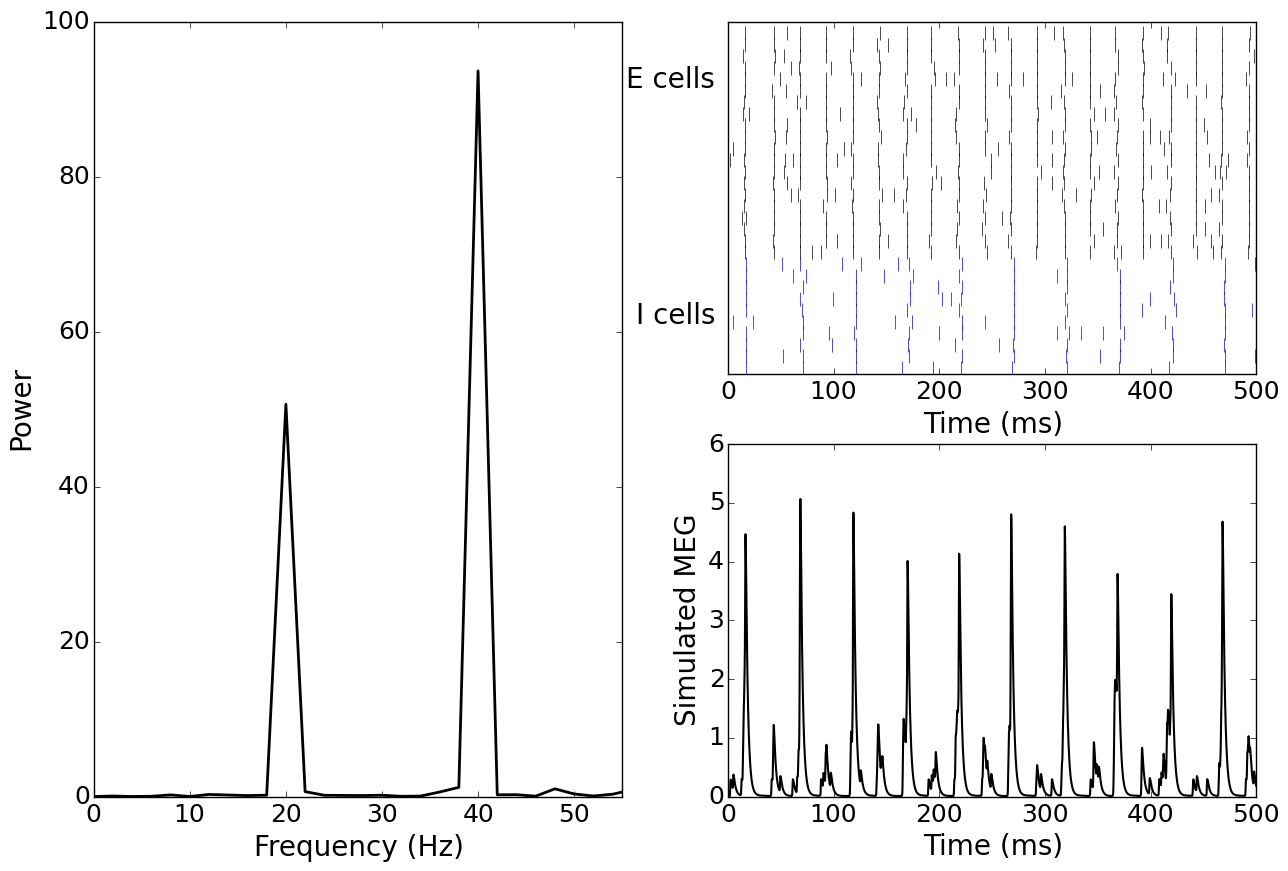

In [24]:
plt.figure(4,figsize=[15.0,10.0])
ax1 = plt.subplot2grid((2,2),(0,0), rowspan=2)
ax2 = plt.subplot2grid((2,2),(0,1))
ax3 = plt.subplot2grid((2,2),(1,1))


# Raster plot
spike_times = getSpikeTimes(data_ex,dt)
for i,times in enumerate(spike_times):
    y = [i+10]*len(times)
    ax2.plot(times,y,linestyle='None',color='k',marker='|',markersize=10)

spike_times = getSpikeTimes(data_inh,dt)
for i,times in enumerate(spike_times):
    y = [i]*len(times)
    ax2.plot(times,y,linestyle='None',color='b',marker='|',markersize=10)
    ax2.axis([0,sim_time,-0.5,30])
ax2.set_xlabel('Time (ms)',fontsize=20)
ax2.set_yticks([])
ax2.annotate('I cells',xy=(0,0.5),xytext=(-ax2.yaxis.labelpad,-75),xycoords=ax2.yaxis.label,textcoords='offset points',size=20,ha='right',va='top')
ax2.annotate('E cells',xy=(0,0.5),xytext=(-ax2.yaxis.labelpad,75),xycoords=ax2.yaxis.label,textcoords='offset points',size=20,ha='right',va='bottom')
plt.setp(ax2.get_xticklabels(),fontsize=18)


# MEG plot
ax3.plot(time,data_meg,'k',linewidth=1.5)
ax3.set_xlabel('Time (ms)',fontsize=20)
ax3.set_ylabel('Simulated MEG',fontsize=20)
plt.setp(ax3.get_xticklabels(),fontsize=18)
plt.setp(ax3.get_yticklabels(),fontsize=18)

# Power spectrum plot
pxx,freqs = calcPowerSpectrum(data_meg,dt,sim_time)

ax1.plot(freqs*1000,pxx,'k',linewidth=2)
ax1.axis(xmin=0, xmax=55)
ax1.set_xlabel('Frequency (Hz)',fontsize=20)
ax1.set_ylabel('Power',fontsize=20)
plt.setp(ax1.get_xticklabels(),fontsize=18)
plt.setp(ax1.get_yticklabels(),fontsize=18)

### Produce Figure 5 (Replicates Figure 10 from Vierling-Claassen et al.)

#### Load data

In [25]:
data_ex  = np.load('../data/Single-Trial-Data-20Hz/sims_ctrl_20Hz13-Ex.npy')
data_inh = np.load('../data/Single-Trial-Data-20Hz/sims_ctrl_20Hz13-Inh.npy')
data_meg = np.load('../data/Single-Trial-Data-20Hz/sims_ctrl_20Hz13-MEG.npy')

#### Plot figure

[None, None, None, None, None, None, None, None]

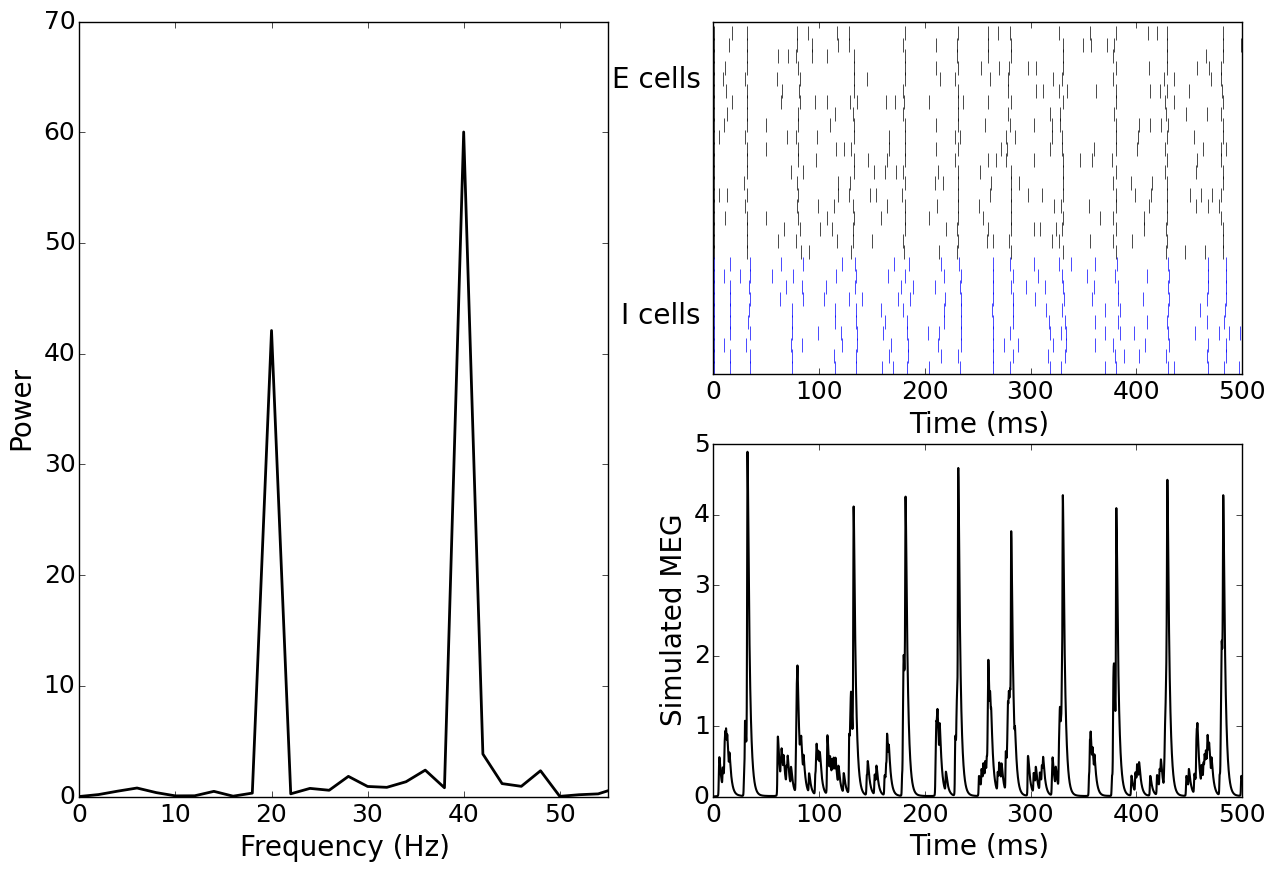

In [27]:
plt.figure(5,figsize=[15.0,10.0])
ax1 = plt.subplot2grid((2,2),(0,0), rowspan=2)
ax2 = plt.subplot2grid((2,2),(0,1))
ax3 = plt.subplot2grid((2,2),(1,1))


# Raster plot
spike_times = getSpikeTimes(data_ex,dt)
for i,times in enumerate(spike_times):
    y = [i+10]*len(times)
    ax2.plot(times,y,linestyle='None',color='k',marker='|',markersize=10)

spike_times = getSpikeTimes(data_inh,dt)
for i,times in enumerate(spike_times):
    y = [i]*len(times)
    ax2.plot(times,y,linestyle='None',color='b',marker='|',markersize=10)
    ax2.axis([0,sim_time,-0.5,30])
ax2.set_xlabel('Time (ms)',fontsize=20)
ax2.set_yticks([])
ax2.annotate('I cells',xy=(0,0.5),xytext=(-ax2.yaxis.labelpad,-75),xycoords=ax2.yaxis.label,textcoords='offset points',size=20,ha='right',va='top')
ax2.annotate('E cells',xy=(0,0.5),xytext=(-ax2.yaxis.labelpad,75),xycoords=ax2.yaxis.label,textcoords='offset points',size=20,ha='right',va='bottom')
plt.setp(ax2.get_xticklabels(),fontsize=18)

# MEG plot
ax3.plot(time,data_meg,'k',linewidth=1.5)
ax3.set_xlabel('Time (ms)',fontsize=20)
ax3.set_ylabel('Simulated MEG',fontsize=20)
plt.setp(ax3.get_xticklabels(),fontsize=18)
plt.setp(ax3.get_yticklabels(),fontsize=18)

# Power spectrum plot
pxx,freqs = calcPowerSpectrum(data_meg,dt,sim_time)

ax1.plot(freqs*1000,pxx,'k',linewidth=2)
ax1.axis(xmin=0, xmax=55)
ax1.set_xlabel('Frequency (Hz)',fontsize=20)
ax1.set_ylabel('Power',fontsize=20)
plt.setp(ax1.get_xticklabels(),fontsize=18)
plt.setp(ax1.get_yticklabels(),fontsize=18)


### Produce Figure 6 (Replicates Figure 11 from Vierling-Claassen et al.)

#### Load data

In [28]:
data_ex  = np.load('../data/Single-Trial-Data-20Hz/sims_schiz_20Hz13-Ex.npy')
data_inh = np.load('../data/Single-Trial-Data-20Hz/sims_schiz_20Hz13-Inh.npy')
data_meg = np.load('../data/Single-Trial-Data-20Hz/sims_schiz_20Hz13-MEG.npy')

#### Plot figure

[None, None, None, None, None, None, None, None]

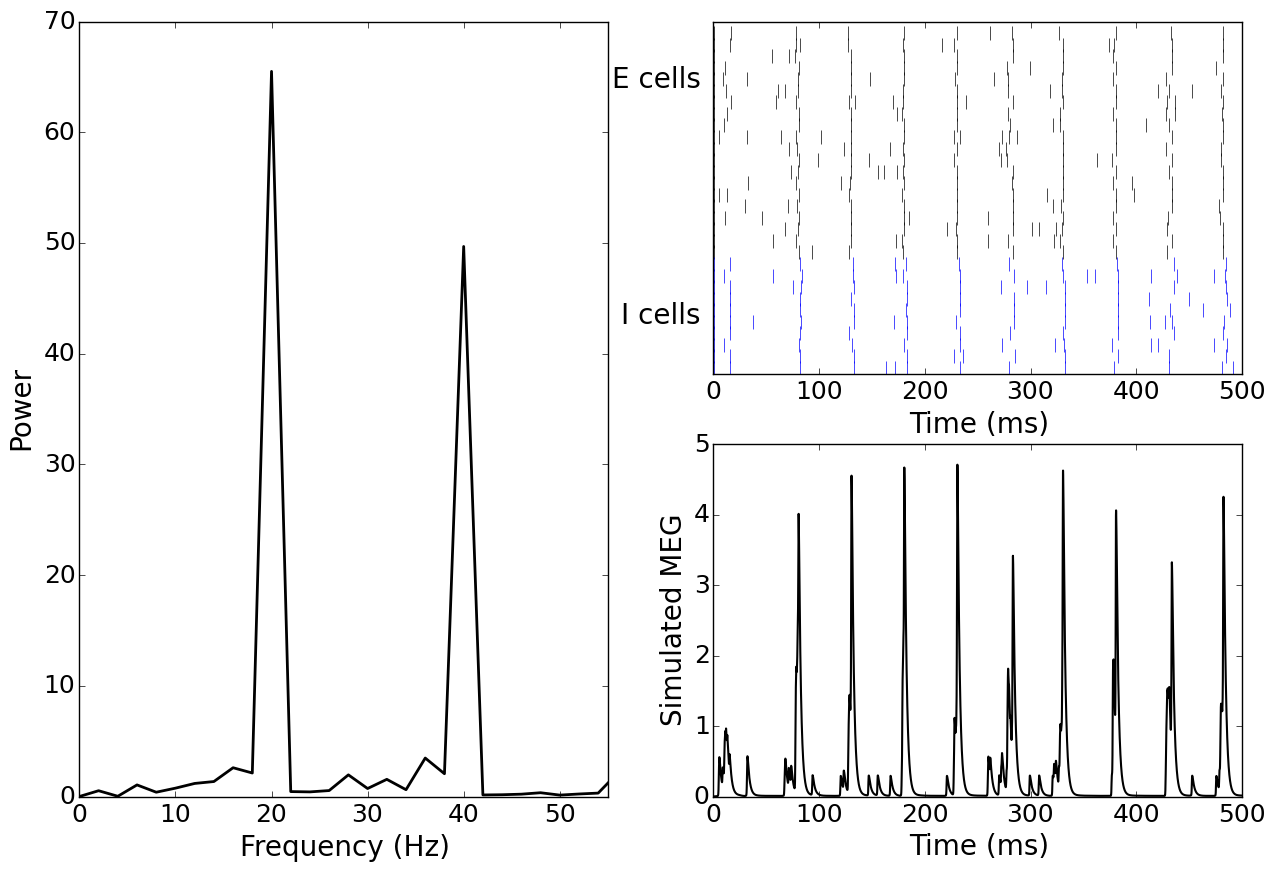

In [30]:
plt.figure(6,figsize=[15.0,10.0])
ax1 = plt.subplot2grid((2,2),(0,0), rowspan=2)
ax2 = plt.subplot2grid((2,2),(0,1))
ax3 = plt.subplot2grid((2,2),(1,1))


# Raster plot
spike_times = getSpikeTimes(data_ex,dt)
for i,times in enumerate(spike_times):
    y = [i+10]*len(times)
    ax2.plot(times,y,linestyle='None',color='k',marker='|',markersize=10)

spike_times = getSpikeTimes(data_inh,dt)
for i,times in enumerate(spike_times):
    y = [i]*len(times)
    ax2.plot(times,y,linestyle='None',color='b',marker='|',markersize=10)
    ax2.axis([0,sim_time,-0.5,30])
ax2.set_xlabel('Time (ms)',fontsize=20)
ax2.set_yticks([])
ax2.annotate('I cells',xy=(0,0.5),xytext=(-ax2.yaxis.labelpad,-75),xycoords=ax2.yaxis.label,textcoords='offset points',size=20,ha='right',va='top')
ax2.annotate('E cells',xy=(0,0.5),xytext=(-ax2.yaxis.labelpad,75),xycoords=ax2.yaxis.label,textcoords='offset points',size=20,ha='right',va='bottom')
plt.setp(ax2.get_xticklabels(),fontsize=18)

# MEG plot
ax3.plot(time,data_meg,'k',linewidth=1.5)
ax3.set_xlabel('Time (ms)',fontsize=20)
ax3.set_ylabel('Simulated MEG',fontsize=20)
plt.setp(ax3.get_xticklabels(),fontsize=18)
plt.setp(ax3.get_yticklabels(),fontsize=18)

# Power spectrum plot
pxx,freqs = calcPowerSpectrum(data_meg,dt,sim_time)

ax1.plot(freqs*1000,pxx,'k',linewidth=2)
ax1.axis(xmin=0, xmax=55)
ax1.set_xlabel('Frequency (Hz)',fontsize=20)
ax1.set_ylabel('Power',fontsize=20)
plt.setp(ax1.get_xticklabels(),fontsize=18)
plt.setp(ax1.get_yticklabels(),fontsize=18)
